### Ejercicio 1: Relaciones de recurrencia

Así como se hizo en clase para la exponencial, el logaritmo, y las potencias; obtén las series de recurrencia para las siguientes funciones:

* Seno.
* Coseno.
* Tangente.
* Cotangente.

¿Hay algún problema al intentar calcular la cotangente? Si la respuesta es sí ¿cuál?, si la respuesta es no ¿por qué?

Sean las series de Taylor:

$$ \large sin(x)=\sum_{i=0}^{\infty}S_k(x-x_0)^k \ ; \ cos(x)=\sum_{i=0}^{\infty}C_k(x-x_0)^k$$ 

donde 


$$ S_k= \frac{dsin(x_0)}{dx} \ ; C_k=\frac{dcos(x_0}{dx} $$

Por otro lado sabemos que se satisfacen las siguientes dos ecuaciones diferenciales:

$$  \frac{dsin(x)}{dx}=cos(x)$$ 

$$\frac{dcos(x)}{dx}=-sin(x)$$

Nuestro objetivo consiste ahora en obetner unas realciones para encontrar el valor de las cosntantes del desarrollo de Taylor $S_k$ y  $C_k$.

Para ellos substituyamos las expansiones en Taylor dadas anteriormente en éstas ecuaciones diferenciales. Así obtenemos:

$$\sum_{i=1}^{infty}kS_k(x-x_0)^{k-1}=\sum_{i=0}^{\infty}C_k(x-x_0)^{k}$$

$$\sum_{i=i}^{infty}kC_k(x-x_0)^{k-1}=-\sum_{i=0}^{\infty}S_k(x-x_0)^k$$

### Ejercicio 2: Integración con Runge–Kutta

Utilizando el método de [Runge–Kutta de cuarto orden](http://www.ctcms.nist.gov/~langer/oof2man/RegisteredClass-RK4.html) haz lo siguiente:

* Integra la siguiente ecuación diferencial,

$$ \dot{x} = x^2, \qquad x(0) = 1.$$ 

* Compara tu solución contra la solución analítica en una gráfica.
* Muestra cómo se comporta el error.

In [1]:
using PyPlot;

INFO: Loading help data...


Empezaremos resolviendo el problema en el intervalo para $t \in [0,1]$.
Usaremos un paso h definido por la cantidad de puntos en en la que queremos dividir el interval dado. 

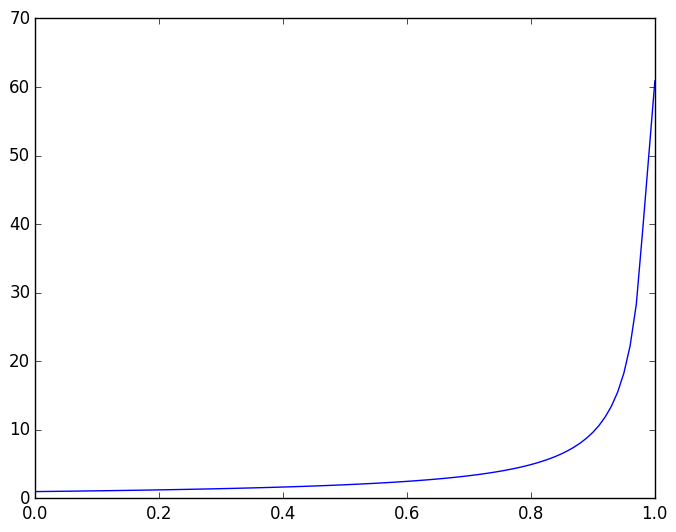

In [81]:
n=100
h=(1-0)/n #tamaño de h
f(x)=x^2
k1(x)=f(x)
k2(x)=f(x+(1/2)*k1(x)*h)
k3(x)=f(x+(1/2)*k2(x)*h)
k4(x)=f(x+(1/2)*k3(x)*h)
t=zeros(n)
x=zeros(n)
t[1]=0
x[1]=1
for i in 1:(length(t)-1)
    t[i]=0+(i-1)*h
    x[i+1]=x[i]+(1/6)*(k1(x[i])+2*k2(x[i])+2*k3(x[i])+k4(x[i]))*h
end 
t[n]=1

plot(t,x);

Resolviendo la ecuación diferencial separando variables se encuentra que la solución analítica  es:

$$\large x(t)=\frac{-1}{(t-1)}$$

In [95]:
s=zeros(n) #solución exacta
[s[i]=-1/(t[i]-1) for i in 1:length(s)] #evaluamos la función en cada uno de los puntos del intervalo [0,1) 
                                         #definido por el arreglo t;

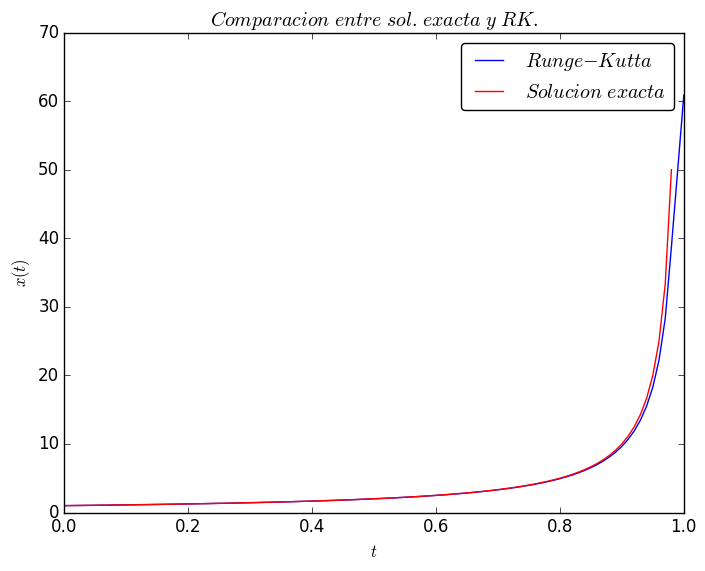

In [101]:
#subplot(121)
plot(t,x,"b",label=L"Runge-Kutta")
plot(t,s,"r",label=L"Solucion \ exacta")
xlabel(L"t")
ylabel(L"x(t)")
title(L"Comparacion \ entre \ sol. \ exacta \ y \ RK. ")
#subplot(122)
#plot(t,x,"b",label=L"Runge-Kutta")
#plot(t,s,"r",label=L"Solucion \ exacta")
#axis([0.6,1,0,70])
legend(loc="best",fancybox="true");

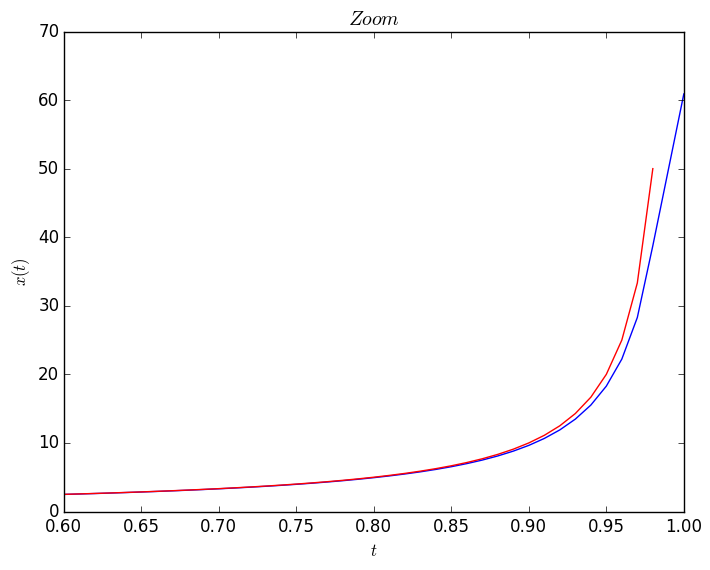

In [102]:
plot(t,x,"b",label=L"Runge-Kutta")
plot(t,s,"r",label=L"Solucion \ exacta")
xlabel(L"t")
ylabel(L"x(t)")
title(L"Zoom")
axis([0.6,1,0,70]);

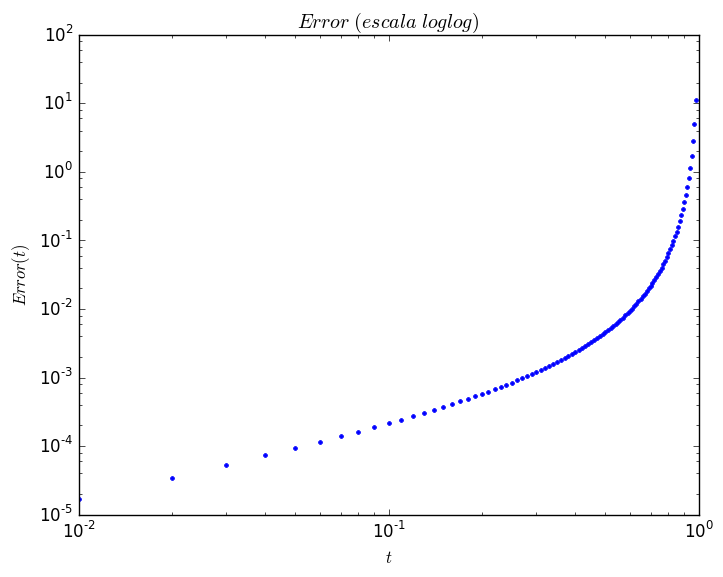

In [106]:
err=zeros(n)
[err[i]=abs(x[i]-s[i]) for i in 1:length(t)]
loglog(t,err,"b.")
title(L"Error \ (escala \ loglog)")
xlabel(L"t")
ylabel(L"Error(t)");

###  Ejercicio 3: Integración con Taylor 

Repite los tres puntos del ejercicio anterior utilizando el método de integración de Taylor.

### Ejercicio 4: Recordatorio

> Memoria minuitur nisi eam exerceas — La memoria disminuye si no la ejercitas (Marco Tulio Cicerón).

Con tus palabras explica (sin utilizar muchas matemáticas) lo siguiente:

* La esencia del método de integración de Taylor.
* ¿Qué relación tiene con los duales?
* ¿Cómo elegimos el paso de avance en el método de Taylor?
* ¿Se pueden integrar sistemas de ecuaciones con este método? ¿Por qué?

-) La escencia del método de integración de Taylor consiste en resolver ecuaciones diferenciales ordinarias a partir de la expansión 